<a href="https://colab.research.google.com/github/acastellanos-ie/NLP-MBD-EN-2023-A-Electives/blob/main/tagging_parsing_practice/pos_tagging_practice_proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Configuration

**Execute this steps to configure the Google Colab environment in order to execute this notebook. It is not required if you are executing it locally and you have properly configured your local environment according to what explained in the Github Repository.**

The first step is to clone the repository to have access to all the data and files.

In [ ]:
repository_name = "NLP-MBD-EN-2023-A-Electives"
repository_url = 'https://github.com/acastellanos-ie/' + repository_name

In [ ]:
! git clone $repository_url

Cloning into 'NLP-SAMBD-EN-2021'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 57 (delta 19), reused 48 (delta 15), pack-reused 0
Unpacking objects: 100% (57/57), done.


Install the requirements (be aware that it could take a while)

In [ ]:
! pip install -Uqqr $repository_name/requirements.txt

     |████████████████████████████████| 12.0 MB 1.3 MB/s 
     |████████████████████████████████| 3.4 MB 6.2 MB/s 
     |████████████████████████████████| 1.5 MB 43.8 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
     |████████████████████████████████| 432 kB 54.3 MB/s 
     |████████████████████████████████| 126 kB 65.1 MB/s 
     |████████████████████████████████| 10.4 MB 64.4 MB/s 
     |████████████████████████████████| 10.5 MB 44.1 MB/s 
     |████████████████████████████████| 24.8 MB 1.3 MB/s 
     |████████████████████████████████| 631 kB 50.5 MB/s 
     |████████████████████████████████| 385 kB 48.1 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:42tcmalloc: large alloc 1147494400 bytes == 0x563e381bc000 @  0x7f8f2f45e615 0x563dfe05b4cc 0x563dfe13b47a 0x563dfe05e2ed 0x563dfe14fe1d 0x563dfe0d1e99 0x563dfe0cc9ee 0x563dfe05fbda 0x563dfe0d1d00 0x563dfe0cc9ee 0x563dfe05fbda 0x563dfe0ce737 0x563dfe150c66 0x563dfe0cddaf 0x563dfe150c66 0x563dfe0

Everything is set up properly! You can now move on to the practice code.

I do recommend you to restart the environment at this point to ensure that Google Colab is aware of the installed packages and their configuration (see image below).

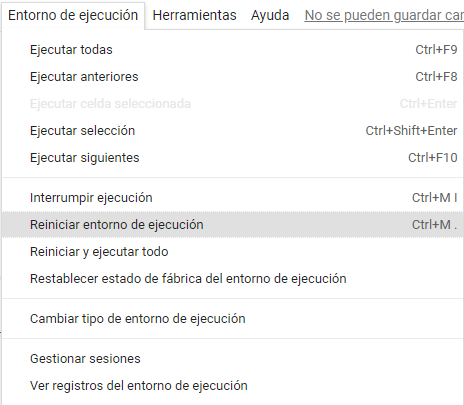

# Parts of Speech Tagging Practice

The purpose of this practical session is to experiment with Part-of-Speech tagging, using the tools provided by NLTK.

We will make use of the contents of the [Chapter 5](http://www.nltk.org/book/ch05.html) of the
[Natural Language Processing with Python --- Analyzing Text with the Natural Language Toolkit](http://www.nltk.org/book). As experimental dataset, we will use the [Brown Corpus](http://en.wikipedia.org/wiki/Brown_Corpus). The Brown Corpus defines a tagset (specific collection of part-of-speech labels) that has been reused in many other annotated resources in English. The [universal tagset](http://universaldependencies.org/u/pos/) includes 17 tags:

Tag	| Meaning	 | Examples
----|------------|----------
ADJ	| adjective	 | new, good, high, special, big, local
ADV	| adverb	 | really, already, still, early, now
CONJ| conjunction| and, or, but, if, while, although
DET	| determiner | the, a, some, most, every, no
X	| other, foreign words | dolce, ersatz, esprit, quo, maitre
NOUN | noun	     | year, home, costs, time, education
PROPN| proper noun | Alison, Africa, April, Washington
NUM	 | numeral	| twenty-four, fourth, 1991, 14:24
PRON | pronoun	| he, their, her, its, my, I, us
ADP  | adposition, preposition | on, of, at, with, by, into, under
AUX	 | auxiliary verb | has (done), is (doing), will (do), should (do), must (do), can (do)
INTJ | interjection | ah, bang, ha, whee, hmpf, oops
VERB | verb | is, has, get, do, make, see, run
PART | particle | possessive marker 's, negation 'not'
SCONJ | subordinating conjunction: complementizer, adverbial clause introducer | I believe 'that' he will come, if, while
SYM	| symbol | $, (C), +, *, /, =, :), john.doe@example.com



Note that the decision on how to tag a word, without more information is ambiguous for multiple reasons:

- The same string can be understood as a `noun` or a `verb` (e.g, **book**).
- Some POS tags have a systematically ambiguous definition: a present participle can be used in progressive verb usages (I am going:VERB), but it can also be used in an adjectival position modifying a noun: (A striking:ADJ comparison). In other words, it is unclear in the definition itself of the tag whether the tag refers to a syntactic function or to a morphological property of the word.


## 0. Working on the Brown Corpus with NLTK

NLTK contains a collection of tagged corpora, arranged as convenient Python objects. We will use the `Brown corpus` in this experiment.  The `tagged_sents` version of the corpus is a list of sentences. Each sentence is a list of pairs (`tuples`) `(word, tag)`. Similarly, one can access the corpus as a flat list of tagged words.

In [ ]:
import nltk

# Download and import the Brown Corpus
nltk.download('brown')
from nltk.corpus import brown

brown_news_tagged = brown.tagged_sents(categories='news', tagset='universal')
brown_news_words = brown.tagged_words(categories='news',  tagset='universal')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In addition to the `Brown Corpus` we also need to also load the `universal_tagset`, an interface for converting POS tags from various formats to the universal tagset format.

In [ ]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

### Measuring success: Accuracy, Training Dataset, Test Dataset

Assume we develop a tagger. How do we know how successful it is? Can we trust the decisions the tagger makes? In order to evaluate the tagger, we are going to split the dataset into training and testing:

In [ ]:
brown_train = brown_news_tagged[100:]
brown_test = brown_news_tagged[:100]

from nltk.tag import untag
test_sent = untag(brown_test[0])
print("Tagged: ", brown_test[0])
print()
print("Untagged: ", test_sent)

Tagged:  [('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')]

Untagged:  ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']


## 1. Baseline Tagger: Default Tag

In the absence of any knowledge, the most basic tagging approach is to assign the same tag to all the words.
It can be done with the `DefaultTagger` class, which takes a tag and assign it to all the words.

In [ ]:
# A default tagger assigns the same tag to all words
from nltk import DefaultTagger
default_tagger = DefaultTagger('default_tag')
default_tagger.tag('This is a test'.split())

[('This', 'default_tag'),
 ('is', 'default_tag'),
 ('a', 'default_tag'),
 ('test', 'default_tag')]

### Exercise 1.1

Using the `DefaultTagger`, try different tags (see the available options in the table at the beginning of the notebook).

**Which one is offering the best performance? Why?**

To measure success, in this task, we will measure accuracy. The tagger object in NLTK includes a method called `evaluate` to measure the accuracy of a tagger on a given test set (our `brown_test` object).


Let's try different tags:

In [ ]:
# Your code here

## 2. Sources of Knowledge to Improve Tagging Accuracy

Intuitively, the sources of knowledge that can help us decide what is the tag of a word include:
- A dictionary that lists the possible parts of speech for each word
- The context of the word in a sentence (neighboring words)
- The morphological form of the word (suffixes, prefixes)


### 2.1 Lookup Tagger: Using Dictionary Knowledge

Assume we have a dictionary that lists the possible tags for each word in English. Could we use this information to perform better tagging?

The intuition is that we would only assign to a word a tag that it can have in the dictionary. For example, if `box` can only be a `Verb` or a `Noun`, when we have to tag an instance of the word `box`, we only choose between 2 options - and not between 17 options.

There are 3 issues we must address to turn this into working code:

- Where do we get the dictionary?
- How do we choose between the various tags associated to a word in the dictionary? (For example, how do we choose between `VERB` and `NOUN` for `box`).
- What do we do for words that do not appear in the dictionary?

The simple solutions we will test are the following - note that for each question, there exist other strategies that we will investigate later:

- Where do we get the dictionary?: we will learn it from a sample dataset.
- How do we choose between the various tags associated to a word in the dictionary?: we will choose the most likely tag as observed in the sample dataset.
- What do we do for words that do not appear in the dictionary?: we will pass unknown words to a backoff tagger (tag all unknown words as `NOUN`).

The `nltk.UnigramTagger` implements this overall strategy. It must be trained on a dataset, from which it builds a model of "unigrams". The following code shows how it is used:

### Exercise 2.1.1

Use the `UnigramTagger` class and the `brown_train` object to create a unigram tagger.

**Which tag is selecting to annotate each word?**

**What's happening with unknown words?**

In [ ]:
# Prepare training and test datasets
from nltk import UnigramTagger

# Train the unigram model

# Your code here


### Exercise 2.1.2

Making use of the `evaluate` method measure how successful is this tagger.

**Are we improving the performance of the tagger?**
**Do your find the new performance sufficient enough for a NLP system?**

In [ ]:
# Your code here

### Exercise 2.1.3

If we analyze the tagger annotation, we will see that it assigns `None` to unknown words. As explained in class, a good way to improve this is to tag unknowns words as `NOUN` (the most common tag). This is known as a backoff tagger (i.e., a second tagger that applies where the original one cannot identify the tag for a word)

NLTK provides a simple way to implement this backoff tagging. All the constructors for the Tagger classes (e.g., `UnigramTagger`) have a parameter `backoff` where you can set the backoff tagger that will apply. In this case, our backoff tagger will be the `DefaultTagger` that annotates `NOUN`, which we developed in the exercise below .

**Using the `DefaultTagger` and `UnigramTagger` classes, create a tagger that assigns the most common tag to each word and, for unknown words, assigns a backoff tag of `NOUN`.**

**What's the accuracy of this tagger? Do we improved our performance?**

In [ ]:
# Your code here

### 2.2 Using Morphological Clues

As mentioned above, another knowledge source to perform tagging is to look at the letter structure of the words.
We will look at 2 different methods to use this knowledge.
First, we will use nltk.RegexpTagger to recognize specific regular expressions in words.

In [ ]:
from nltk import RegexpTagger

regexp_tagger = RegexpTagger(
     [(r'^-?[0-9]+(.[0-9]+)?$', 'NUM'),   # cardinal numbers
      (r'(The|the|A|a|An|an)$', 'DET'),   # articles
      (r'.*able$', 'ADJ'),                # adjectives
      (r'.*ness$', 'NOUN'),               # nouns formed from adjectives
      (r'.*ly$', 'ADV'),                  # adverbs
      (r'.*s$', 'NOUN'),                  # plural nouns
      (r'.*ing$', 'VERB'),                # gerunds
      (r'.*ed$', 'VERB'),                 # past tense verbs
      (r'.*', 'NOUN')                     # nouns (default)
])

print('Regexp accuracy %4.1f%%' % (100.0 * regexp_tagger.evaluate(brown_test)))

Regexp accuracy 48.2%


The regular expressions are tested in order. If one matches, it decides the tag. Else it tries the next tag.


The question we face when we see such a "rule-based" tagger are:

- How do we find the most successful regular expressions?
- In which order should we try the regular expressions?

A typical answer to such questions is:

- let's learn these parameters from a training corpus.

The `nltk.AffixTagger` is a trainable tagger that attempts to learn word patterns.
It only looks at the last letters in the words in the training corpus, and counts how often a word suffix
can predict the word tag.
In other words, we only learn rules of the form ('.*xyz' , POS).
This is how the affix tagger is used:

In [ ]:
from nltk import AffixTagger

affix_tagger = AffixTagger(brown_train, backoff=DefaultTagger('NOUN'))
print('Affix tagger accuracy: %4.1f%%' % (100.0 * affix_tagger.evaluate(brown_test)))

Affix tagger accuracy: 42.3%


Should we be disappointed that the "data-based approach" performs worse than the hand-written rules (42% vs. 48%)?

Not necessarily: note that our hand-written rules include cases that the AffixTagger cannot learn - we match cardinal numbers and suffixes with more than 3 letters.

Let us see whether the combination of the 2 taggers helps:


### Exercise 2.2.1

**Using the `AffixTagger` class, creates a tagger that learns from word patterns and that uses the previous `RegexpTagger` as backoff.**

**Evaluate and analyze the performance of the model**

In [ ]:
# Your code here

### Exercise 2.2.2

In the previous exercise we created an `AffixTagger` that is able to learn the annotation from the word patterns. Perhaps, we could apply this tagger to annotate the unknown words (i.e., to use it as a backoff tagger). In the previous section, we used a NOUN-default tagger for that. How much does this tagger help the `UnigramTagger` if we use it as a backoff instead of the NOUN-default tagger?

**Use the `AffixTagger` that we created below as a backoff tagger for the `UnigramTagger` in the previous section**

**Are we improving our tagger?**

In [ ]:
# Your code here

###  2.3 Looking at the Context

At this point, we have combined 2 major sources of information: dictionary and morphology and obtained about 95.4% accuracy. The last source of knowledge we want to exploit the context of the word to be tagged: **the words that appear around the word to be tagged**.

The intuition is that if we have to decide between `book` as a verb or a noun, the word/s preceding `book` can give us strong cues: for example, if it is an article (`the` or `a`) then we would be sure that `book` is a noun; if it is `to`, then we would be sure it is a verb.

How can we turn this intuition into working code? The easiest way to detect predictive contexts is to construct a list of contexts - and for each context, keep track of the distribution of tags that follow it. Luckily for us, this procedure is already implemented into the `NgramTagger`, which takes a parameter a number setting the length of the context.

As usual, if the tagger cannot make a decision (because the observed context was never seen at training time),
the decision is delegated to a backoff tagger.

### Exercise 2.3.1

**Use the `NgramTagger` to create a context-based tagger. For the cases that this tagger cannot annotate anything, use the previous `UnigramTagger` as backoff.**

**Try different context sizes (you can set that as a parameter when you create the `NgramTagger`) and analyze how it affects to the final performance of the model.**

In [ ]:
from nltk import NgramTagger

# Your code here

In [ ]:
# Your code here

## Summary

This practice introduced tools to tag parts of speech in free text. The key point of the approach we investigated is that it is **data-driven**:

- We first define possible knowledge sources that can help us solve the task. Specifically, we investigated
  * dictionary,
  * morphological
  * context
  as possible sources.

- We tested simple machine learning methods: data is acquired by inspecting a training dataset, then evaluated by testing on a test dataset.

- We investigated one method to combine several systems into a combined system: backoff models.


# Additional Materials: Practical Tagging

In this practice we have played with the development of new Taggers. You can refer back to this Notebook if and when you need to create your own Taggers. Nevertheless, most of the time the Taggers already included in the different libraries will do the trick for you.

In particular, NLTK provides you a way to tag your dataset with just a couple of lines of code by using the `pos_tag` function.

The first thing we need to do is to tokenize the sentence to be tagged. To that end, we can make use of the `word_tokenize` function in NLTK. To perform this tokenization, we need to download an already developed tokenizer model (`punkt`)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text = nltk.word_tokenize("And now for something completely different")
text

['And', 'now', 'for', 'something', 'completely', 'different']

Then we should feed our tokenized text to the pos tagging function. In this case, we are going to apply one of the already pre-trained pos tagging models included into NLTK: `averaged_perceptron_tagger`

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

If we have more than one sentence to parse, we can make use of some of the Sentence Tokenizers that nltk provides (e.g. `sent_tokenize`) to split the text in sentences, and the the word tokenizer to split each sentence in words.

In [ ]:
sentences = nltk.sent_tokenize("And now for something completely different. This is just another sentence")
print("Sentences:", sentences)
text = [nltk.word_tokenize(sentence) for sentence in sentences]
print("Text:", text)
print()
for tagging in [nltk.pos_tag(t) for t in text]:
    print("Tagging:",tagging)

Sentences: ['And now for something completely different.', 'This is just another sentence']
Text: [['And', 'now', 'for', 'something', 'completely', 'different', '.'], ['This', 'is', 'just', 'another', 'sentence']]

Tagging: [('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ'), ('.', '.')]
Tagging: [('This', 'DT'), ('is', 'VBZ'), ('just', 'RB'), ('another', 'DT'), ('sentence', 'NN')]


Let's see a full example with a proper corpus. NLTK provides many corpora that can be used for research or for the training of our NLP system. To find a comprehensive list of all the corpus and how to use them, please refer to the [2nd Chapter of the NLTK book](https://www.nltk.org/book/ch02.html).

We will use the corpus `state_union` including the texts of the State of the Union addresses since 1945. Let's load one of these speeches.

In [ ]:
# Download and import the State of the Union adresses corpus
nltk.download('state_union')
from nltk.corpus import state_union

text = state_union.raw("1946-Truman.txt")
text[:1000]

[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.


"PRESIDENT HARRY S. TRUMAN'S MESSAGE TO THE CONGRESS ON THE STATE OF THE UNION AND ON THE BUDGET FOR 1946.\n \nJanuary 21, 1946. Dated January 14, 1946 \n\nTo the Congress of the United States:\nA quarter century ago the Congress decided that it could no longer consider the financial programs of the various departments on a piecemeal basis. Instead it has called on the President to present a comprehensive Executive Budget. The Congress has shown its satisfaction with that method by extending the budget system and tightening its controls. The bigger and more complex the Federal Program, the more necessary it is for the Chief Executive to submit a single budget for action by the Congress.\nAt the same time, it is clear that the budgetary program and the general program of the Government are actually inseparable. The President bears the responsibility for recommending to the Congress a comprehensive set of proposals on all Government activities and their financing. In formulating policies

We now define a function `tag_corpus` that takes care of the tagging process. First, it splits the text in sentences with the `sent_tokenize` function. Then, it iterates over these sentences, tokenize them with the `word_tokenize` function and apply the `pos_tag` function to the tokens.

In [ ]:
def tag_corpus(corpus_text):
    try:
        for sentence in nltk.sent_tokenize(corpus_text)[:5]: # We just process 5 sentences for the sake of simplicity
            words = nltk.word_tokenize(sentence)
            tagged = nltk.pos_tag(words)
            print("Sentence:", sentence, "\nTagging:", tagged)
            print()

    except Exception as e:
        print(str(e))


tag_corpus(text)

Sentence: PRESIDENT HARRY S. TRUMAN'S MESSAGE TO THE CONGRESS ON THE STATE OF THE UNION AND ON THE BUDGET FOR 1946. 
Tagging: [('PRESIDENT', 'NNP'), ('HARRY', 'NNP'), ('S.', 'NNP'), ('TRUMAN', 'NNP'), ("'S", 'POS'), ('MESSAGE', 'NN'), ('TO', 'VBD'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('AND', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('BUDGET', 'NNP'), ('FOR', 'NNP'), ('1946', 'CD'), ('.', '.')]

Sentence: January 21, 1946. 
Tagging: [('January', 'NNP'), ('21', 'CD'), (',', ','), ('1946', 'CD'), ('.', '.')]

Sentence: Dated January 14, 1946 

To the Congress of the United States:
A quarter century ago the Congress decided that it could no longer consider the financial programs of the various departments on a piecemeal basis. 
Tagging: [('Dated', 'VBN'), ('January', 'NNP'), ('14', 'CD'), (',', ','), ('1946', 'CD'), ('To', 'TO'), ('the', 'DT'), ('Congress', 'NNP'), ('of', 'IN'), ('the', 'DT'), 

Same function in a more *pythonic* way

In [ ]:
def pythonized_tag_corpus(corpus_text):
    try:
        [print("Sentence:", sentence, "\nTagging:", nltk.pos_tag(nltk.word_tokenize(sentence)), "\n") for sentence in nltk.sent_tokenize(corpus_text)[:5]]
    except Exception as e:
        print(str(e))

pythonized_tag_corpus(text)

Sentence: PRESIDENT HARRY S. TRUMAN'S MESSAGE TO THE CONGRESS ON THE STATE OF THE UNION AND ON THE BUDGET FOR 1946. 
Tagging: [('PRESIDENT', 'NNP'), ('HARRY', 'NNP'), ('S.', 'NNP'), ('TRUMAN', 'NNP'), ("'S", 'POS'), ('MESSAGE', 'NN'), ('TO', 'VBD'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('AND', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('BUDGET', 'NNP'), ('FOR', 'NNP'), ('1946', 'CD'), ('.', '.')] 

Sentence: January 21, 1946. 
Tagging: [('January', 'NNP'), ('21', 'CD'), (',', ','), ('1946', 'CD'), ('.', '.')] 

Sentence: Dated January 14, 1946 

To the Congress of the United States:
A quarter century ago the Congress decided that it could no longer consider the financial programs of the various departments on a piecemeal basis. 
Tagging: [('Dated', 'VBN'), ('January', 'NNP'), ('14', 'CD'), (',', ','), ('1946', 'CD'), ('To', 'TO'), ('the', 'DT'), ('Congress', 'NNP'), ('of', 'IN'), ('the', 'DT')